# Table of Contents
- [Introduction](#Introduction)
- [Method: Logistic Regression](#Method:-Logistic-Regression)
    - Assumptions
- [Data Preparation](#Data-Preparation)
    - [Importing Necessary Libraries](#Importing-Necessary-Libraries)
    - [Loading the Data](#Loading-the-Data)
    - Variables
    - [Data Cleaning Goals](#Data-Cleaning-Goals)
    - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
        - [Summary Statistics](#Summary-Statistics)
        - [Univariate Visualizations](#Univariate-Visualizations)
        - [Bivariate Visualizations](#Bivariate-Visualizations)
    - [Data Transformation](#Data-Transformation)
        - Encoding
        - Logarithmic Transformation
        - Scaling
    - [Multicollinearity Detection](#Multicollinearity-Detection)
    - [Prepared Data](#Prepared-Data)
- [Model Comparison and Analysis](#Model-Comparison-and-Analysis)
    - [Initial Logistic Regression Model](#Initial-Logistic-Regression-Model)
    - [Model Evaluation](#Model-Evaluation)
    - [Feature Selection](#Feature-Selection)
- [Data Summary and Implications](#Data-Summary-and-Implications)
    - Limitations
    - Recommendations

# Introduction
Hospital readmissions can place a significant burden on healthcare resources and can also be indicative of the quality of care received during the initial admission. Understanding the factors that influence these readmissions is crucial for healthcare organizations aiming to optimize patient care and manage resources effectively.The investigation of "What influences the likelihood of a patient being readmitted to the hospital?" is significant in actual organizational situations. Hospitals always strive to minimize readmissions for patient comfort and effective resource management. Utilizing the available data set, we will apply logistic regression to identify the primary factors contributing to readmission.

**Objective:**
- Identify Key Determinants: Unearth the primary factors in the dataset that have a statistically significant impact on the probability of patient readmission.
- Model Optimization: Develop a logistic regression model that accurately predicts the likelihood of readmission based on the identified factors.
- Inform Organizational Strategy: Equip healthcare organizations with data-driven insights that can inform strategies aimed at reducing readmissions and enhancing patient care.


# Method: Logistic Regression
Logistic regression is a reliable technique to consider when predicting a patient's probability of readmission. Its ability to interpret predictor coefficients as odds ratios and handle both numerical and categorical variables is especially valuable. Unlike other methods, logistic regression does not assume a linear relationship between variables and can manage interaction terms. In the end, logistic regression provides healthcare professionals with actionable and insightful strategies, making it an excellent choice for this type of analysis.

**Assumptions**
- Categorical Outcome: Binary logistic regression assumes that the response variable only takes on two possible outcomes.
- Independence of Observations: Each observation in the dataset must be independent of the others. This means that the occurrence or value of the outcome variable for one observation should not be influenced by or dependent on the outcomes of other observations.
- Linearity of the Logit: Logistic regression assumes linearity between predictors and the log odds of the outcome. In practical terms, this means when the factors change, the chances of the outcome change in a predictable way.
- No Perfect Multicollinearity: There should not be perfect multicollinearity among the independent variables. Multicollinearity is the phenomenon where independent variables are strongly correlated, leading to potential inaccuracies in the analysis. It is challenging to distinguish their individual effects on the outcome. Perfect multicollinearity, where one variable can be perfectly predicted from another, should be avoided. Simply put, the factors you use to predict something should not be too similar to each other.

# Data Preparation

**Data Cleaning Goals**
To prepare the dataset for logistic regression analysis, we will take the following steps:
- Identify and address any missing data by using the summarytools package on medical_data. This will display key details such as the number of entries, columns, data types, possible missing values, and summary statistics.
- Remove any irrelevant information that may negatively affect the analysis.
- Ensure that each variable has the correct data type; for example, Age is stored initially as an integer but should be a float due to being technically continuous.
- Convert categorical variables into a format that is suitable for analysis using onehotencoder.
- Use log transformation to manage any outliers that may skew the data.
- Scale the data to ensure all variables have a mean of zero and standard deviation of one.
- Remove any features with a high variance inflation factor (VIF) to improve the accuracy of the analysis.


### Importing Necessary Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary


# Statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Pandas display option
pd.set_option("display.max_columns", None)


### Loading the Data

In [2]:
medical_data = pd.read_csv('medical_clean.csv')
medical_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Dropping survey columns Item1 to Item8
medical_data.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'],axis=1,inplace=True)

In [4]:
# Dropping demographic columns 
medical_data.drop(columns = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Area','TimeZone','Job','Marital','Children','Gender','Population'],inplace = True)

In [5]:
# Converting "Age" column to float
medical_data['Age'] = medical_data['Age'].astype('float64')

In [6]:
# selecting continuous variables
continuous_vars = medical_data.select_dtypes(include='float64').columns
# selecting categorical variables
categorical_vars = medical_data.select_dtypes(exclude='float64').columns

**Variables**

The dependent variable that indicates if a patient has been readmitted to the hospital after their initial visit is called 'ReAdmis.' Some features, like 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Marital', 'Children', 'Gender', and 'Population' are irrelevant and have been removed. The independent variables that will be examined include both continuous and categorical variables. The continuous variables consist of 'Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', and 'Additional_charges.' The categorical variables are 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', and 'Services.'


## Exploratory Data Analysis


### Summary Statistics

In [7]:
dfSummary(medical_data,is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[float64],Mean (sd) : 53.5 (20.6)min < med < max:18.0 < 53.0 < 89.0IQR (CV) : 35.0 (2.6),72 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3asU/bQBiG8e8Sgi6E2gpJYcvSEalDJBaWbh37x3bt1iFInRm6dGJBSMgkiksUY6dDkaoONPY5Jn2t57eGL3Z0z+ELwm02GwP+d5193wBQxsG+bwDt4Zzrm9lh4Ph6s9k8vvQioWInnHP90Wj0KYqiYcj8YrFInHOfX4p1a6hN7hK0ymEURcPLy8vHOI5XVQbn87mfzWbD+/v7QzOrHmrTuwTtE8fx6vT09GfAaP9fL277jdroLgHKKnVGbWqXYPfaelRr7Zepmgtm9vtPd0Xg7F4WvM1HtUZDzfO8Z2aRcy70LUJj8ScnJx/jOB6EXDTP816apu+Oj49/dDqdrOr8w8PD0jn3xcwqHZee1Ym8tUe1xkJN07SXZdn7yWTS7Xa7lResTixZlnkzO7+4uPg2Ho8XVa99c3MzvL6+fjudTr+fnZ0lVWZvb2/fXF1dfZhMJuOQz10z8qgoil4cx0nbjmqNhbperw+890fT6XRVdbHN6sXyPHvkvc9CFixJkr6Z2WAwqHw2T5KkH/q560aeZZnP8/x8tVp9NbPKn7vmEzAqiqIXMlhG42fUkMU2qx9L1evt2mtHbvZngz49PXWrztZ9AtbdJNu09suUsrqbO8SOnoBBm6QMQsVf9rFJyuC/pyCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHhoMwPzedzX/WNl8ulNzNL09Tf3d0dvea86rVV77vufJm+fgFFPnL1B2RO9gAAAABJRU5ErkJggg=="">",0(0.0%)
2,Income[float64],Mean (sd) : 40490.5 (28521.2)min < med < max:154.1 < 33768.4 < 207249.1IQR (CV) : 34697.6 (1.4),"9,993 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3cMW/aQBiA4e9KQAYiAyKCjZWhUgdGlv6D/tiu3YrEjsQ/YEMyGIQbB2PcKVPTJNzZ6X3u++xnbnhldHB3pigKAXz36V9PAHiPuyofboxpi0jL4RHnoigey5oP9KosVGNMezgcfgvDcGD7jOPxuDfGfCdWVPlGbYVhOJjP54+9Xi+9dfDhcAiWy+UgiqKWiBDqf67Sr34RkV6vl45Go1+Ww9ulTgZqsZiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQpv/jPlsLEkvF6vTYtxwB9eDdVlY0mWZUGe55/TNP0pIrZ/oQIi8vYb1XpjyWazGazX687lcmk4zA8QkXduSrHZWLLf79lQgtKwmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFSo/1+8iz/OmiITGGJvhXAdUI96GmiRJM8uyL5PJpNFoNG6+aYXrgOrF21DP5/NdEASd2WyWjsfj/S1juQ6ofrwN9Vm327W9EojdWzXCYgoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQre70e15XiMRYSjLF6pZaiux1hEOMrim1qG6nKMRYSjLD6qZajPHI6xiHCUxSsspqACoUIFQoUKhAoVCBUqECpUIFSoQKhQodY/+Lvgyku/EOoLuPLSP4T6Aq689A+hvoIrL/3BYgoq8EatAAux8hFqyViIVYNQS+a6EFssFqMoih6MMUfbKdQxckKtiM1CrIwjNHEcn4wxP0TEZry3kb8r1MPhENz64NPpFIiIJEkSbLfbzkeO1/rZu93uPgiCznQ6Nf1+/+mWsSIicRzfr1arr5PJ5MEmdMfIXT0VRfHXz/0NFyk98m/OwwoAAAAASUVORK5CYII="">",0(0.0%)
3,ReAdmis[object],1. No2. Yes,"6,331 (63.3%)3,669 (36.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOElEQVR4nO3bwYnDMBRF0a/BhMlGwhhcjIuYYqcIdWOMtUhCNsoiNfjJ1r+ngp9wMST4hVqrAQrBzO5mdmt9COxda322PuJIwzRNfzHGsfUh3pVSthDCf8/BDTHGcVmWZ0rp1foYr/Z9/805j+u63sys39jMzFJKr3meH62Pce7e+oCj/bQ+AH4QG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggM5h9X95rfYhnXr7/oZSy5ZxHc/Dy3pmVUjYze7e+40gMXs6j+8FLYMoHFS9Ptu6fGlfgYsrnYSZ3Bd1P+bzM5K7Ay5SPX9onwJ+6kCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGm+ylfz5/talxM+TzM5K6AwQtkPgpbat+zkoHLAAAAAElFTkSuQmCC"">",0(0.0%)
4,VitD_levels[float64],Mean (sd) : 18.0 (2.0)min < med < max:9.8 < 18.0 < 26.4IQR (CV) : 2.7 (8.9),"9,976 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3csY7aQBCA4dn4IAYSW4AEHS9wUgpK+rR52LTpUlBczRvQIAQyIHznYIzTpYLk8Jqws/xfP6ctfp1s3+2YsiwFcN2Hex8AeI+nex/AVcaYlog0K44fyrJ8q/M8j45QzzDGtPr9/rcoirpV5ne7XWKM+U6s9SHU85pRFHUnk8lbHMfZNYPb7TacTqfd9XrdFBFCrQmh/kUcx9lgMHitMNqq/TAPjpcpqECoUIFQoQLPqDdQFEVDRCJjTJVxPm2dQag1S9O0kef5l9FoFARBcNUXAxE+bV1CqDU7HA5PYRi2x+NxNhwOk2tm+bR1GaHeSKfT4dNWjXiZggqEChUIFSoQKl

### Univariate Visualizations

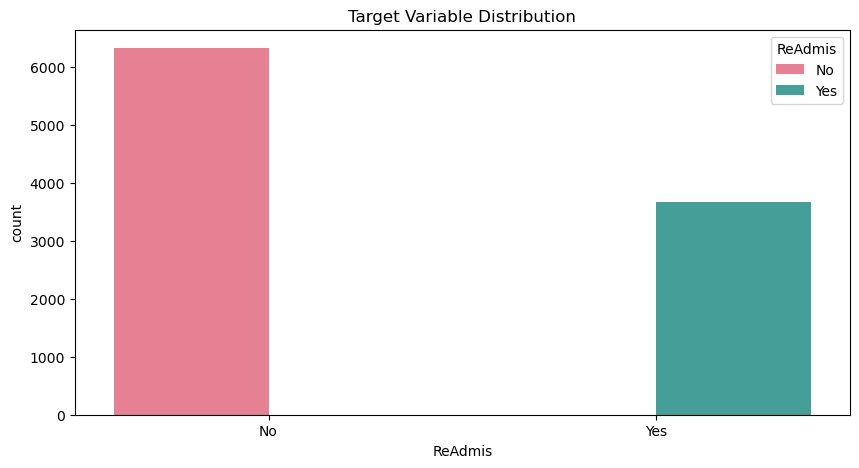

In [8]:
# Creating a visualization for the distribution of the target variable 'ReAdmis'

# Create a new figure with a specified size
plt.figure(figsize=(10,5))

# Create a count plot for the 'ReAdmis' column in the dataset
# The 'hue' parameter is used to group the bars in the count plot by the unique values in 'ReAdmis'
# The 'palette' parameter is used to specify the color palette for the bars
sns.countplot(data=medical_data, x='ReAdmis', hue="ReAdmis", palette='husl')

# Set the title for the plot to provide context
plt.title('Target Variable Distribution')

# Display the plot
plt.show()

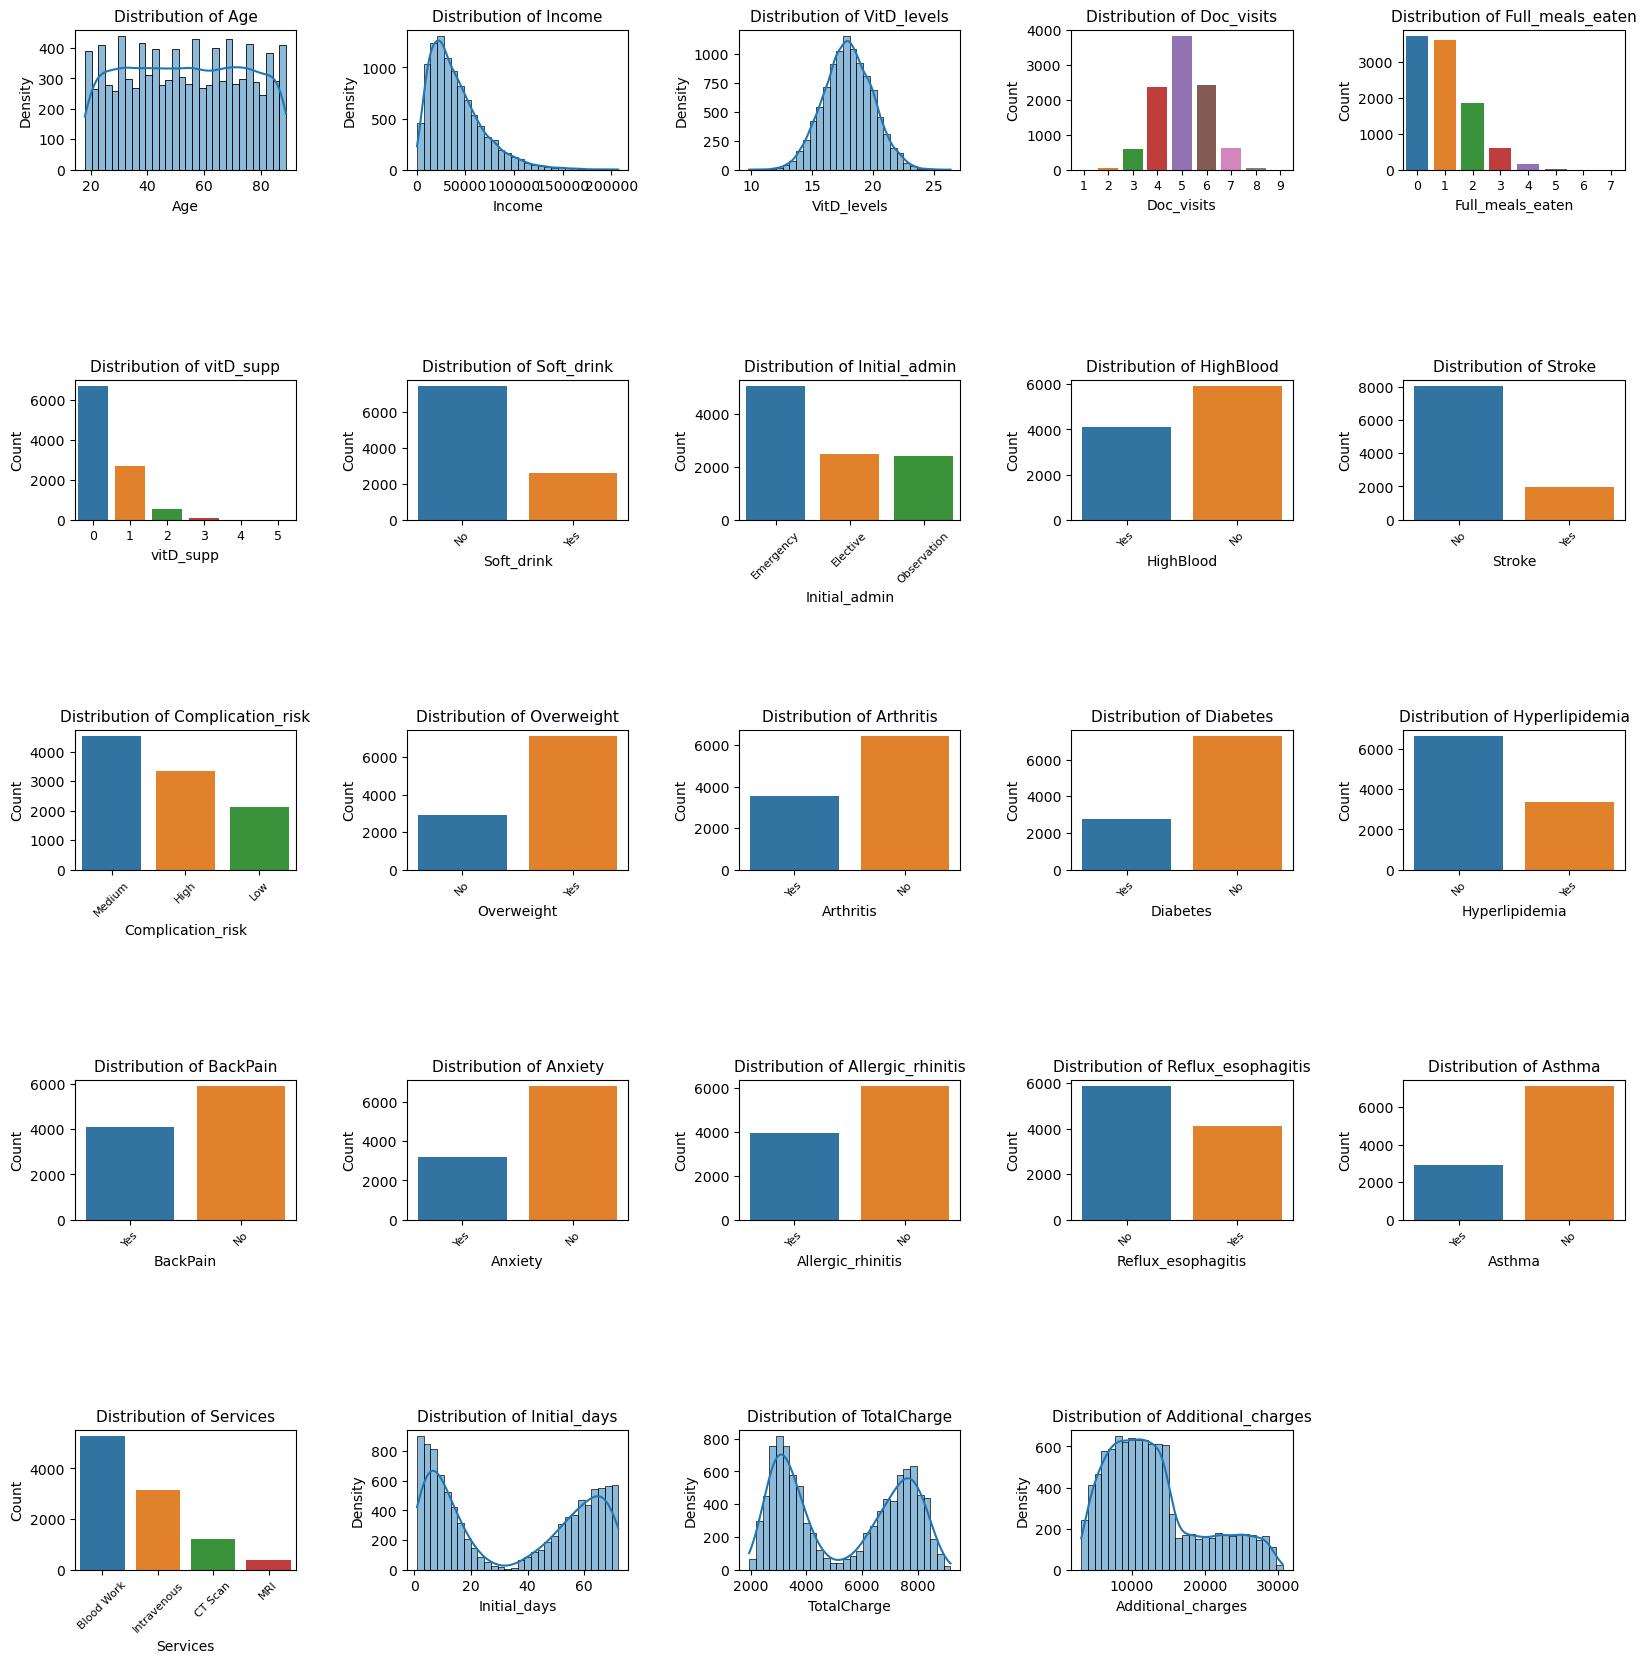

In [9]:
# Creating univariate visualizations to visualize the distribution of each feature

# Set up a 5x5 grid of plots with a specified size
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Extracting all feature names except 'ReAdmis'
cols = medical_data.drop(columns='ReAdmis').columns

# Loop through each feature in the dataset
for i, var in enumerate(cols):
    
    # If the feature is categorical or integer type
    if medical_data[var].dtype == 'int64' or medical_data[var].dtype == 'object':
        # Create a count plot (bar chart) for the feature
        ax = sns.countplot(data=medical_data, x=var, ax=axes[i//5, i%5])
        
        # Set the title, x and y labels for the plot
        ax.set_title("Distribution of " + var, fontsize=11)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel("Count", fontsize=10)
        
        # Adjust tick parameters for better visualization
        if medical_data[var].dtype == 'int64':
            ax.tick_params(axis="x", labelsize=9)
        else:
            ax.tick_params(axis="x", rotation=45, labelsize=8)
            
        # Special handling for 'Initial_admin' to set custom x-tick labels
        if var == 'Initial_admin':
            ax.set_xticklabels(['Emergency', 'Elective', 'Observation'], rotation=45)
        
        # Adjust spacing between the subplots
        plt.subplots_adjust(hspace=1.5, wspace=.5)
    
    # If the feature is continuous
    else:
        # Create a histogram with KDE (Kernel Density Estimation) for the feature
        ax = sns.histplot(medical_data[var], bins=30, kde=True, ax=axes[i//5, i%5])
        
        # Set the title, x and y labels for the histogram
        ax.set_title("Distribution of " + var, fontsize=11)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        
        # Adjust spacing between the subplots
        plt.subplots_adjust(hspace=1.5, wspace=.5)

# Turn off the bottom-right subplot since it's not being used
axes[4,4].axis('off');

### Bivariate Visualizations


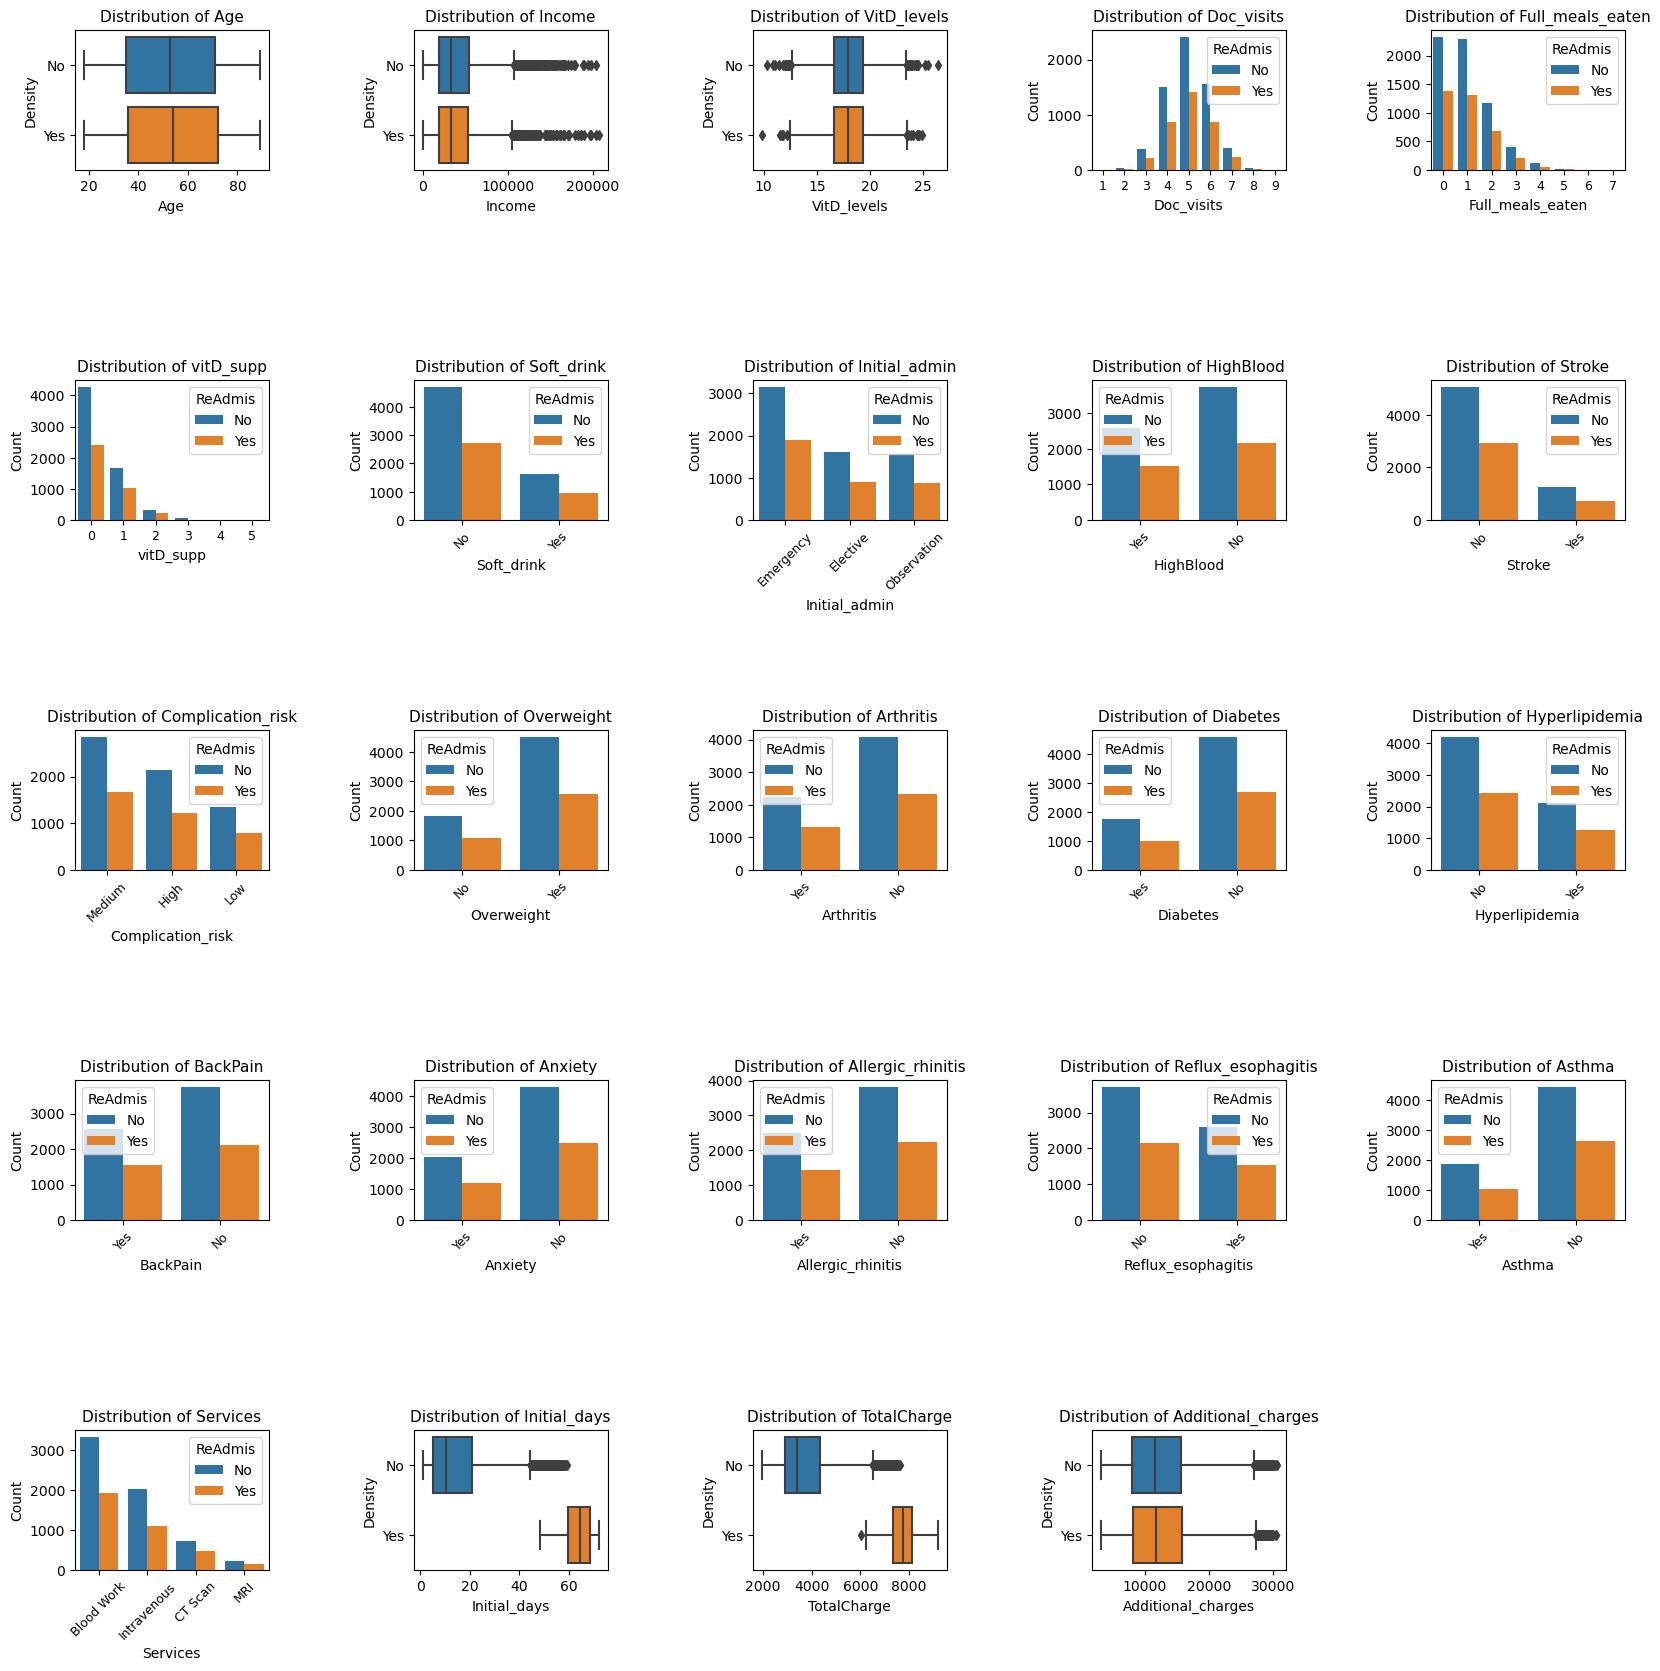

In [10]:
# Creating bivariate visualizations to see the relationship between each feature and 'ReAdmis'

# Set up a 5x5 grid of plots with a specified size
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Loop through each feature in the dataset
for i, var in enumerate(cols):
    
    # If the feature is categorical or integer type
    if medical_data[var].dtype == 'int64' or medical_data[var].dtype == 'object':
        # Create a count plot (bar chart) with 'ReAdmis' as the hue (color differentiator)
        ax = sns.countplot(data=medical_data, x=var, hue='ReAdmis', ax=axes[i//5, i%5])
        
        # Set the title, x and y labels for the plot
        ax.set_title("Distribution of " + var, fontsize=11)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel("Count", fontsize=10)
        
        # Adjust tick parameters for better visualization
        if medical_data[var].dtype == 'int64':
            ax.tick_params(axis="x", labelsize=9)
        else:
            ax.tick_params(axis="x", rotation=45, labelsize=9)
            
        # Special handling for 'Initial_admin' to set custom x-tick labels
        if var == 'Initial_admin':
            ax.set_xticklabels(['Emergency', 'Elective', 'Observation'], rotation=45)
        
        # Adjust spacing between the subplots
        plt.subplots_adjust(hspace=1.5, wspace=.75)
    
    # If the feature is continuous
    else:
        # Create a boxplot to visualize the distribution of the feature across the two categories of 'ReAdmis'
        ax = sns.boxplot(x=medical_data[var], y=medical_data['ReAdmis'], ax=axes[i//5, i%5])
        
        # Set the title, x and y labels for the boxplot
        ax.set_title("Distribution of " + var, fontsize=11)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        
        # Adjust spacing between the subplots
        plt.subplots_adjust(hspace=1.5, wspace=.75)
        
# Turn off the bottom-right subplot since it's not being used
axes[4,4].axis('off');


## Data Transformation

**Encoding**

To ensure the final dataset is suitable for logistic regression modeling we must transform the data.
The dataset has categorical variables with string values that cannot be used directly in the logistic regression model. To fix this, we need to convert them into numerical values. We can do this by using OneHotEncoder provided by the scikit-learn library to encode the multi-categorical features. As for binary predictors, we will map "Yes" or "True" values to one and "No" or "False" values to zero.


In [11]:
medical_data_encoded = medical_data.copy()

In [12]:
def encode_one_hot(data, columns_to_encode):
    """
    Encodes specified columns using one-hot encoding.

    Parameters:
    - data: DataFrame to be encoded
    - columns_to_encode: List of columns to be one-hot encoded

    Returns:
    - DataFrame with one-hot encoded columns
    """
    
    # Initialize a OneHotEncoder with specific settings:
    # 'drop="first"' means drop the first category in each feature to avoid multicollinearity.
    # 'sparse_output=False' means the output should be a dense array (not a sparse matrix).
    encoder = OneHotEncoder(drop='first', sparse_output=False)

    # Apply the encoder to transform the specified columns into one-hot encoded format.
    encoded_data = encoder.fit_transform(data[columns_to_encode])

    # Convert the encoded data into a DataFrame with appropriate column names.
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

    # Concatenate the original data (excluding the columns_to_encode) with the encoded data.
    # The final result replaces the original categorical columns with their one-hot encoded counterparts.
    data = pd.concat([data.drop(columns_to_encode, axis=1), encoded_df], axis=1)

    return data

In [13]:
def encode_binary(data, binary_columns=None):
    """
    Encodes binary columns into 0s and 1s.

    Parameters:
    - data: DataFrame to be encoded
    - binary_columns: List of binary columns to be encoded into 0s and 1s. If None, it will be inferred from the data.

    Returns:
    - DataFrame with binary encoded columns
    """
    
    # Check if the 'binary_columns' variable is not provided (i.e., it's None).
    if binary_columns is None:
        # Identify columns in the data that have exactly 2 unique values.
        # These are assumed to be binary columns.
        binary_columns = data.nunique()[data.nunique() == 2].keys().tolist()

    # Convert the values in the identified binary columns:
    # "Yes" and True are mapped to 1.
    # "No" and False are mapped to 0.
    # 1 and 0 remain unchanged.
    data[binary_columns] = data[binary_columns].apply(
        lambda x: x.map({"Yes": 1, "No": 0, True: 1, False: 0, 1: 1, 0: 0})
    )

    
    return data

In [14]:
columns_to_encode = ['Services', 'Complication_risk', 'Initial_admin']
medical_data_encoded = encode_one_hot(medical_data_encoded, columns_to_encode)
medical_data_encoded = encode_binary(medical_data_encoded)

In [15]:
medical_data_encoded.head().T

,0,1,2,3,4
Age,53.000000,51.000000,53.000000,78.000000,22.000000
Income,86575.930000,46805.990000,14370.140000,39741.490000,1209.560000
ReAdmis,0.000000,0.000000,0.000000,0.000000,0.000000
VitD_levels,19.141466,18.940352,18.057507,16.576858,17.439069
Doc_visits,6.000000,4.000000,4.000000,4.000000,5.000000
Full_meals_eaten,0.000000,2.000000,1.000000,1.000000,0.000000
vitD_supp,0.000000,1.000000,0.000000,0.000000,2.000000
Soft_drink,0.000000,0.000000,0.000000,0.000000,1.000000
HighBlood,1.000000,1.000000,1.000000,0.000000,0.000000
Stroke,0.000000,0.000000,0.000000,1.000000,0.000000


**Logarithmic Transformation**

It's important to note that algorithms can be sensitive to the distribution of feature values. One way to help reduce skewness and achieve more normally distributed data is by applying logarithmic transformation. To do this, we first detect any outliers and then use the numpy function np.log1p(x) which computes the natural logarithm of 1 + x. This method is more accurate when handling small values of x.


In [16]:
def detect_outliers(data, columns_of_interest):
    """
    Detects outliers in the specified columns using two methods: Z-Score and Interquartile Range (IQR).
    
    Z-Score method identifies data points that are distant from the mean in terms of standard deviations.
    The IQR method identifies data points that are below the 1st quartile or above the 3rd quartile by 
    a certain factor.

    Parameters:
    - data: DataFrame containing the dataset from which outliers need to be detected
    - columns_of_interest: List of columns in which to check for outliers

    Returns:
    - Tuple containing:
        z_outliers_count: Number of outliers detected using Z-Score method for each column
        iqr_outliers_count: Number of outliers detected using IQR method for each column
    """
    
    # Computing Z-Scores of the data.
    # Z-Score indicates how many standard deviations a data point is from the mean.
    z_scores = pd.DataFrame(stats.zscore(data[columns_of_interest]))
    abs_z_scores = np.abs(z_scores)
    
    # Counting the number of data points with Z-Score greater than 3 as outliers.
    z_outliers_count = (abs_z_scores > 3).sum()

    # Computing Interquartile Range (IQR) for outlier detection.
    # IQR is the difference between the upper (75%) and lower (25%) quartiles.
    Q1 = data[columns_of_interest].quantile(0.25)
    Q3 = data[columns_of_interest].quantile(0.75)
    IQR = Q3 - Q1
    
    # Counting data points that lie below Q1 - 1.5*IQR or above Q3 + 1.5*IQR as outliers.
    iqr_outliers_count = ((data[columns_of_interest] < (Q1 - 1.5 * IQR)) | 
                          (data[columns_of_interest] > (Q3 + 1.5 * IQR))).sum()
    
    return z_outliers_count, iqr_outliers_count

In [17]:
columns_of_interest = ['Age', 'Income', 'VitD_levels', 'Initial_days']
z_outliers, iqr_outliers = detect_outliers(medical_data, columns_of_interest)

print('Z-Score Outliers')
display(z_outliers)
print('\nIQR Outliers')
display(iqr_outliers)

Z-Score Outliers


Age               0
Income          143
VitD_levels      24
Initial_days      0
dtype: int64


IQR Outliers


Age               0
Income          326
VitD_levels      60
Initial_days      0
dtype: int64

The two side-by-side histograms visually compare the 'Income' data distribution before and after the transformation. 

Text(0.5, 1.0, 'Income after transformation')

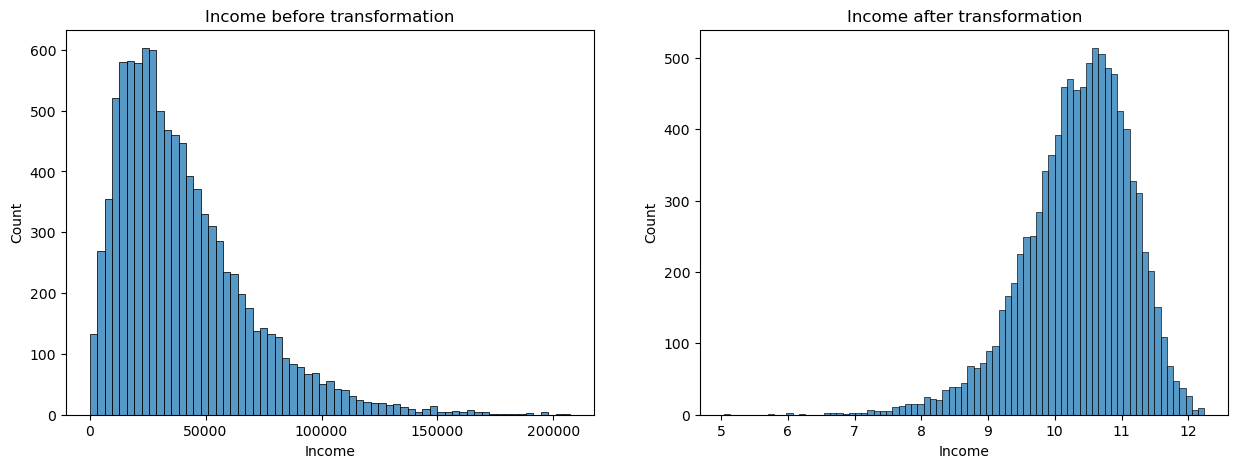

In [18]:
# Apply log transform the 'Income' column to make its distribution more normal.
# np.log1p(x) computes the natural logarithm of 1+x, and is more accurate for handling small values of x.
medical_data_encoded['Income'] = np.log1p(medical_data_encoded['Income'])

# Create two lists for plotting: original 'Income' and its transformed version.
income = medical_data['Income']
income_log = medical_data_encoded['Income']
transformed_vars = [income, income_log]

# Set up a subplot grid with 1 row and 2 columns (side-by-side plots).
axes, fig = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

# For each version of 'Income' (original and transformed), plot its histogram.
for i, var in enumerate(transformed_vars):
    sns.histplot(var, ax=fig[i])        # Plot histogram using seaborn's histplot
    fig[i].set_xlabel('Income')         # Set x-axis label
    fig[i].set_ylabel('Count')          # Set y-axis label
    
# Set titles for both subplots.
fig[0].set_title('Income before transformation')
fig[1].set_title('Income after transformation')

**Scaling**

Scaling is important for logistic regression as it ensures that all variables contribute equally to the model, without any variable dominating due to its scale.
We will use the StandardScaler class from Scikit-learn to scale the numerical variables to have a mean of approximately zero and a standard deviation of one.

The StandardScaler does the following:
1.	Mean Calculation: It calculates the mean of the feature (column).
2.	Standard Deviation Calculation: It calculates the standard deviation of the feature.
3.	Standardization: For each data point in the feature, the scaler subtracts the mean and then divides by the standard deviation.


In [19]:
# Identify and exclude categorical columns from scaling 
# This is because scaling is typically applied to continuous numeric data and not to categorical data
non_numerical_cols = medical_data_encoded.select_dtypes(exclude='float64')

# Extract the features (columns) that will be scaled
features = medical_data_encoded.drop(columns=non_numerical_cols)

# Initialize the StandardScaler, which will standardize (mean=0, variance=1) the features
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame for easier manipulation and interpretation
medical_data_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Merge back the non-numerical columns into the scaled dataset
for col in non_numerical_cols:
    medical_data_scaled[col] = medical_data_encoded[col]

# Display a summary of the scaled dataset using a custom function 'dfSummary'
# The 'is_collapsible' parameter might be used in the 'dfSummary' function to create a collapsible section in the output
dfSummary(medical_data_scaled[features.columns], is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[float64],Mean (sd) : 0.0 (1.0)min < med < max:-1.7 < -0.0 < 1.7IQR (CV) : 1.7 (0.0),72 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3asU/bQBiG8e8Sgi6E2gpJYcvSEalDJBaWbh37x3bt1iFInRm6dGJBSMgkiksUY6dDkaoONPY5Jn2t57eGL3Z0z+ELwm02GwP+d5193wBQxsG+bwDt4Zzrm9lh4Ph6s9k8vvQioWInnHP90Wj0KYqiYcj8YrFInHOfX4p1a6hN7hK0ymEURcPLy8vHOI5XVQbn87mfzWbD+/v7QzOrHmrTuwTtE8fx6vT09GfAaP9fL277jdroLgHKKnVGbWqXYPfaelRr7Zepmgtm9vtPd0Xg7F4WvM1HtUZDzfO8Z2aRcy70LUJj8ScnJx/jOB6EXDTP816apu+Oj49/dDqdrOr8w8PD0jn3xcwqHZee1Ym8tUe1xkJN07SXZdn7yWTS7Xa7lResTixZlnkzO7+4uPg2Ho8XVa99c3MzvL6+fjudTr+fnZ0lVWZvb2/fXF1dfZhMJuOQz10z8qgoil4cx0nbjmqNhbperw+890fT6XRVdbHN6sXyPHvkvc9CFixJkr6Z2WAwqHw2T5KkH/q560aeZZnP8/x8tVp9NbPKn7vmEzAqiqIXMlhG42fUkMU2qx9L1evt2mtHbvZngz49PXWrztZ9AtbdJNu09suUsrqbO8SOnoBBm6QMQsVf9rFJyuC/pyCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHhoMwPzedzX/WNl8ulNzNL09Tf3d0dvea86rVV77vufJm+fgFFPnL1B2RO9gAAAABJRU5ErkJggg=="">",0(0.0%)
2,Income[float64],Mean (sd) : 0.0 (1.0)min < med < max:-6.7 < 0.1 < 2.4IQR (CV) : 1.3 (0.0),"9,993 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACdUlEQVR4nO3dsW7aQBjA8e9KSAxUPgESbLxApQ6M7F37sH2EDgydeQM2BLKMcGNhDJ1SqVIawt053Gf9f3MuueEvBce578zlchEgdp/uvQHgPR7uvQGEZYzpicij4/Lj5XJ5DrmfUAi1RYwxvfF4/D1N06HL+v1+nxljfsQYK6G2y2OapsPFYvFsrS1vWZjnebJcLoe73e5RRAgVzbPWlpPJ5LfD0l7wzQTCwxRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSrwj9P4q67rroikxhjXb9HYmStChYiIFEXRrarq62w263Q6nZuOsbxo8swVoUJERI7H40OSJP35fF5Op9Ps1vVNn7kiVPxjMBi4nrcSafDMFQ9TUIFQoQKhQgU+o0bGcyRPej6fuyH3EwtCjYjvSJ6qqpK6rr+UZflTRFwfiKJEqHFxHskjIrJer4er1ap/Op06TWzungg1Qq4jebIsi3Ykjy8epqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlTguHQDPKadtHbSiS9CDcxn2kmbJ534ItTwnKedtHnSiS9CbYjLtJM2TzrxxcMUVCBUqECoUIHPqAjG856qN++oIlQE4XtP1bU7qggVQfjcU/WeO6oI9T94u+TG456qN/80R6iv4O1SfAj1dbxdikxrQw1xDY61NuPtUhyuhmqMSUTk6QP2ElIyGo2+WWs/uyx++fW93W5/3br2cDgkIiJFUSSbzab/UWs1/+w8z5NrX/MHzR0LDcmRhE0AAAAASUVORK5CYII="">",0(0.0%)
3,VitD_levels[float64],Mean (sd) : -0.0 (1.0)min < med < max:-4.0 < -0.0 < 4.2IQR (CV) : 1.3 (-0.0),"9,976 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3csY7aQBCA4dn4IAYSW4AEHS9wUgpK+rR52LTpUlBczRvQIAQyIHznYIzTpYLk8Jqws/xfP6ctfp1s3+2YsiwFcN2Hex8AeI+nex/AVcaYlog0K44fyrJ8q/M8j45QzzDGtPr9/rcoirpV5ne7XWKM+U6s9SHU85pRFHUnk8lbHMfZNYPb7TacTqfd9XrdFBFCrQmh/kUcx9lgMHitMNqq/TAPjpcpqECoUIFQoQLPqDdQFEVDRCJjTJVxPm2dQag1S9O0kef5l9FoFARBcNUXAxE+bV1CqDU7HA5PYRi2x+NxNhwOk2tm+bR1GaHeSKfT4dNWjXiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVPD2cp/l2sjodDo16jwP7HgZqu3ayDzPw6IonrMs+ykiVW6SomZehioWayNFRObzeXc2m7WPx2Nwi8Pher6GKiLV10YmScLdesfwMgUVvP6NqpHlgjURT5esEapDbBesifi7ZI1QHWKzYE3E7yVrhOogiwVrIp4uWeNlCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFZz+x2mLJRIskPCMs6HaLJFggYR/nA1VLJZIsEDCPy6HKiLVlkg88gIJy+vWzl61dj5UvJ/tdWuXr1oTqkdsrlu7ftWaUD1kcd3a2UcmvqNCBUKFCoQKFW76jMp6cl1c3iT4z1CNMaGIfKzws8Ner/c1juNPFWb//HVptVq9XDu73+9DEZE0TcPlctn+n/P3mrWdXywWn203CW42m70x5oeIVJn/VZblxbnfLfkrwSxU0C0AAAAASUVORK5CYII="">",0(0.0%)
4,Initial_days[float64],Mean (sd) : -0.0 (1.0)min < med < max:-1.3 < 0.1 < 1.4IQR (CV) : 2.0 (-0.0),"9,997 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2

## Multicollinearity Detection

In order to build accurate regression models, it is necessary to ensure that there is no perfect multicollinearity. Here we identified features that had a high degree of multicollinearity and removed them by performing a correlation analysis. This was done to check the assumption that each predictor variable is not a linear combination of other variables, as indicated by a high variance inflation factor (VIF).

In [20]:
def calculate_vif(data, target_col):
    """
    Calculate VIF (Variance Inflation Factor) for each feature in the data excluding the target column.
    VIF is a measure used to detect multicollinearity in regression models.
    
    Parameters:
    - data: DataFrame containing the dataset
    - target_col: String specifying the name of the target column to exclude
    
    Returns:
    - vif_data: DataFrame containing features and their respective VIF values, sorted by VIF in descending order.
    """
    
    # Drop the target column from the data since we don't want to calculate VIF for the target variable.
    data_vif = data.drop(columns=[target_col])

    # Initialize an empty DataFrame to store feature names and their corresponding VIF values.
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_vif.columns
    
    # Calculate VIF for each feature in the dataset.
    # The variance_inflation_factor function computes the VIF for each feature.
    vif_data["VIF"] = [
        variance_inflation_factor(data_vif.values, i)
        for i in range(data_vif.shape[1])
    ]
    
    # Return the VIF data sorted by VIF values in descending order.
    # Features with high VIF values are more likely to be correlated with other features in the dataset.
    return vif_data.sort_values("VIF", ascending=False)


In [21]:
vif_df = calculate_vif(medical_data_scaled, "ReAdmis")
vif_df

,Feature,VIF
4,TotalCharge,4295.570176
3,Initial_days,4199.532921
26,Initial_admin_Emergency Admission,112.706264
25,Complication_risk_Medium,76.387823
24,Complication_risk_Low,36.412581
6,Doc_visits,24.061479
5,Additional_charges,16.260014
10,HighBlood,12.508511
0,Age,9.247074
16,BackPain,3.929633


In [22]:
cols = vif_df[vif_df['VIF'] > 10]['Feature'].tolist()
print(f'High VIF Features:{cols}')

High VIF Features:['TotalCharge', 'Initial_days', 'Initial_admin_Emergency Admission', 'Complication_risk_Medium', 'Complication_risk_Low', 'Doc_visits', 'Additional_charges', 'HighBlood']


In [23]:
vif_df = calculate_vif(medical_data_scaled, "ReAdmis")

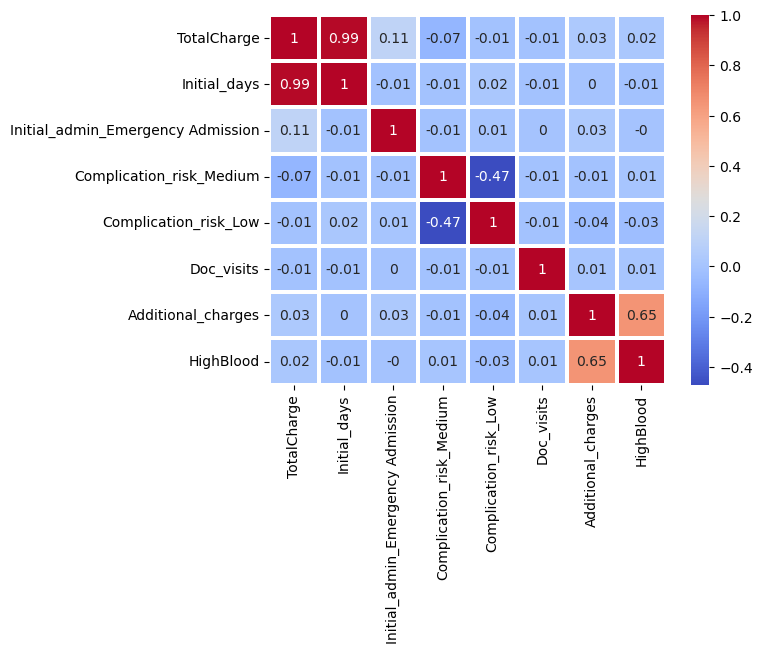

In [24]:
# Create a heatmap using seaborn to visualize the correlation matrix of the selected columns in the scaled medical data.
# This heatmap will give a visual representation of how each pair of variables in 'cols' are linearly related.

# medical_data_scaled[cols].corr().round(2): 
# - Compute the correlation matrix for the columns specified in 'cols' from the 'medical_data_scaled' DataFrame.
# - Round the correlation coefficients to 2 decimal places for better readability.

# linewidths: Width of the lines that will divide each cell.
# annot: If True, correlation coefficients will be written on the heatmap.
# cmap: Specifies the colormap to be used. "coolwarm" is a diverging colormap where negative values are cool (blue) 
#       and positive values are warm (red).
sns.heatmap(medical_data_scaled[cols].corr().round(2), linewidths=1.5, annot=True, cmap="coolwarm");

In [25]:
medical_data_scaled.drop(columns=['TotalCharge','Additional_charges','Complication_risk_Low','Doc_visits'],inplace=True)

In [26]:
vif_df = calculate_vif(medical_data_scaled, "ReAdmis")
vif_df

,Feature,VIF
9,Overweight,2.901277
22,Initial_admin_Emergency Admission,2.487936
4,Full_meals_eaten,1.875427
21,Complication_risk_Medium,1.740145
23,Initial_admin_Observation Admission,1.716073
7,HighBlood,1.634598
13,BackPain,1.631326
16,Reflux_esophagitis,1.621184
15,Allergic_rhinitis,1.579735
19,Services_Intravenous,1.521066


**Prepared Data**

In [27]:
medical_data_encoded=medical_data_scaled.copy()
medical_data_encoded.head().T

,0,1,2,3,4
Age,-0.024795,-0.121706,-0.024795,1.186592,-1.526914
Income,1.289893,0.516704,-0.967828,0.311009,-4.078353
VitD_levels,0.583603,0.483901,0.046227,-0.687811,-0.260366
Initial_days,-0.907310,-0.734595,-1.128292,-1.244503,-1.261991
ReAdmis,0.000000,0.000000,0.000000,0.000000,0.000000
Full_meals_eaten,0.000000,2.000000,1.000000,1.000000,0.000000
vitD_supp,0.000000,1.000000,0.000000,0.000000,2.000000
Soft_drink,0.000000,0.000000,0.000000,0.000000,1.000000
HighBlood,1.000000,1.000000,1.000000,0.000000,0.000000
Stroke,0.000000,0.000000,0.000000,1.000000,0.000000


In [28]:
medical_data_encoded.to_csv('medical_data_encoded.csv',index=False)

# Model Comparison and Analysis


## Initial Logistic Regression Model

Our initial step is to create a logistic regression model using the following features: 'Age," Income,' 'VitD_levels,' 'Initial_days,' 'ReAdmis,' 'Full_meals_eaten,' 'vitD_supp,' 'Soft_drink,' 'HighBlood,' 'Stroke,' 'Overweight,' 'Arthritis,' 'Diabetes,' 'Hyperlipidemia,' 'BackPain,' 'Anxiety,' 'Allergic_rhinitis,' 'Reflux_esophagitis,' 'Asthma," Services_CT Scan,' 'Services_Intravenous,' 'Services_MRI,' 'Complication_risk_Medium,' 'Initial_admin_Emergency Admission,' 'Initial_admin_Observation Admission.' The target variable for the model will be 'ReAdmis.'

We will split the dataset into two sets, one for training and the other for testing. Subsequently, we will use the Synthetic Minority Oversampling Technique (SMOTE) to address the class imbalance in the training data. SMOTE is a statistical technique that augments datasets by producing new instances from existing minority samples. This method enhances the features accessible to each class, resulting in more generalized samples. This approach proves beneficial for imbalanced datasets, leading to improved model performance.

Once the model is trained, we will generate a classification report and display a confusion matrix to evaluate its efficiency.

In [29]:
print(medical_data_encoded.columns)

Index(['Age', 'Income', 'VitD_levels', 'Initial_days', 'ReAdmis',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services_CT Scan', 'Services_Intravenous', 'Services_MRI',
       'Complication_risk_Medium', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission'],
      dtype='object')


In [30]:
# The goal is to build a logistic regression model to predict the 'ReAdmis' target variable. 
# Since the dataset might be imbalanced, the Synthetic Minority Oversampling Technique (SMOTE) is used 
# to balance the classes by oversampling the minority class in the training data.

# Prepare the independent variables (X) and target variable (y)
X = medical_data_encoded.drop(columns='ReAdmis')  # Drop the target column to get only independent variables
y = medical_data_encoded['ReAdmis']

# 1. Split the dataset into training and testing sets:
# - 80% of the data will be used for training and 20% for testing.
# - The random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Balance the training dataset using SMOTE:
# - This helps in addressing class imbalance by creating synthetic samples in the minority class.
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE to the training data

# 3. Train the logistic regression model using the resampled training data:
# - max_iter is set to a large value to ensure convergence.
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# 4. Use the trained model to make predictions on the testing set
y_pred = clf.predict(X_test)

# Print the classification report to evaluate the model's performance on the testing data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1291
           1       0.97      0.99      0.98       709

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



## Model Evaluation

- Precision:

  - Precision quantifies the number of correct positive predictions made. It essentially evaluates the reliability of the model when it predicts a positive outcome.
  - Our model exhibits a precision of 0.97 for readmissions and 0.99 for non-readmissions. This indicates that when our model predicts a readmission, it's correct 97% of the time, and when it predicts a non-readmission, it's correct 99% of the time.
- Recall:

  - Recall, or sensitivity, measures the model's capability to identify all relevant instances. In this context, it gauges the model's ability to identify all actual readmissions.
  - The model's recall score is 0.98 for non-readmissions and 0.99 for readmissions. This denotes that the model successfully identifies 98% of all actual non-readmissions and 99% of all actual readmissions.
- F1-Score:

  - The F1-score is the harmonic mean of precision and recall and provides a singular metric that balances the trade-off between precision and recall.
  - Our model manifests an F1-score of 0.99 for non-readmissions and 0.98 for readmissions, showcasing a commendable balance between precision and recall.
- Accuracy:

  - Accuracy represents the proportion of correct predictions (both true positives and true negatives) in the total predictions.
  - The model's accuracy is 0.98, signifying that 98% of the model's predictions across both classes are accurate.


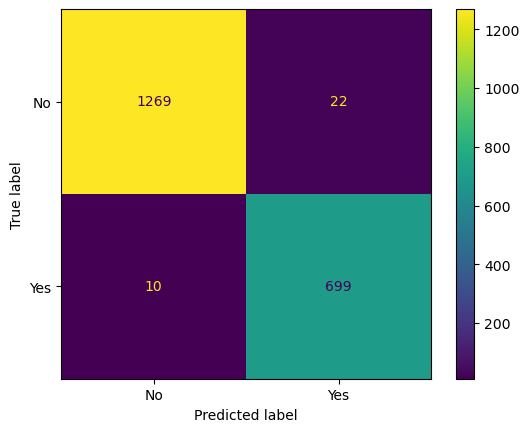

In [31]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=['No','Yes']).plot();

In [32]:
# This code aims to train a logistic regression model using the statsmodels library. 
# After training, it provides a detailed regression summary which includes coefficients, 
# standard errors, p-values, and other statistical measures that help in understanding the significance of each predictor.

# Convert the resampled training data (which is a numpy array) back to a DataFrame 
# This is done to retain column names which are useful when interpreting the regression summary
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns) 

# Add a constant column to the predictors. This constant represents the intercept in the regression equation.
# In linear models, the intercept is the expected mean value of the dependent variable when all independent variables are set to 0.
X_with_const = sm.add_constant(X_train_resampled_df)

# Train the logistic regression model using statsmodels
# - The independent variables are the resampled training data with the added constant
# - The dependent variable is the resampled target variable
statsmodels_logit = sm.Logit(y_train_resampled, X_with_const).fit()

# Display the regression summary
statsmodels_logit.summary()

Optimization terminated successfully.
         Current function value: 0.032226
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10080
Model:                          Logit   Df Residuals:                    10055
Method:                           MLE   Df Model:                           24
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.9535
Time:                        19:39:37   Log-Likelihood:                -324.84
converged:                       True   LL-Null:                       -6986.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.8874      1.684    -17.155      0.000     -32.188     -25.587
Age                                    -0.0207      0.102     -0.204      0.839      -0.220       0.179
Income                                  0.1114      0.104      1.074      0.283      -0.092       0.315
VitD_levels                             0.2198      0.102      2.145      0.032       0.019       0.421
Initial_days                           37.2438      2.069     18.001      0.000      33.189      41.299
Full_meals_eaten                        0.0073      0.106      0.069      0.945      -0.201       0.215
vitD_supp                              -0.0786      0.166     -0.473      0.636      -0.404       0.247
Soft_drink                              0.0946      0.252      0.376      0.707      -0.398       0.588
HighBlood                               0.8824      0.221      3.989      0.000       0.449       1.316
Stroke                                  1.3282      0.274      4.839      0.000       0.790       1.866
Overweight                             -0.0029      0.227     -0.013      0.990      -0.449       0.443
Arthritis                              -1.1087      0.222     -4.995      0.000      -1.544      -0.674
Diabetes                                0.2441      0.234      1.045      0.296      -0.214       0.702
Hyperlipidemia                          0.2161      0.219      0.987      0.324      -0.213       0.645
BackPain                                0.2565      0.213      1.203      0.229      -0.161       0.674
Anxiety                                -1.0630      0.232     -4.582      0.000      -1.518      -0.608
Allergic_rhinitis                      -0.6331      0.216     -2.934      0.003      -1.056      -0.210
Reflux_esophagitis                     -0.5269      0.213     -2.473      0.013      -0.944      -0.109
Asthma                                 -1.3887      0.236     -5.875      0.000      -1.852      -0.925
Services_CT Scan                        1.1426      0.389      2.937      0.003       0.380       1.905
Services_Intravenous                   -0.2337      0.231     -1.014      0.311      -0.686       0.218
Services_MRI                            2.5013      0.561      4.459      0.000       1.402       3.601
Complication_risk_Medium                0.3588      0.209      1.721      0.085      -0.050       0.768
Initial_admin_Emergency Admission       2.3948      0.276      8.661      0.000       1.853       2.937
Initial_admin_Observation Admission     0.7842      0.291      2.699      0.007       0.215       1.354
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [33]:
# This code extracts and filters the p-values from the trained logistic regression model 
# to identify the significant predictors in the regression model.

# Extract the p-values from the trained logistic regression model.
# p-values help determine the significance of each predictor in the model. 
# A smaller p-value suggests that a predictor is statistically significant.
pvalues = statsmodels_logit.pvalues

# Filter the p-values to keep only those that are less than 0.05. 
# A common threshold in statistics is 0.05, below which a predictor is considered statistically significant.
filtered_pvalues = pvalues[pvalues < 0.05].index

# Display the names of the predictors that have p-values less than 0.05.
print(filtered_pvalues)

Index(['const', 'VitD_levels', 'Initial_days', 'HighBlood', 'Stroke',
       'Arthritis', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services_CT Scan', 'Services_MRI',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission'],
      dtype='object')


## Feature Selection

The initial model needs to be reduced to achieve better performance. To achieve this, we will employ the Recursive Feature Elimination with Cross-Validation (RFECV) technique. This technique can boost the model's performance by identifying the most significant features and determining the optimal number of features for the model through cross-validation.
The Recursive Feature Elimination (RFE) technique removes the least important features recursively until it reaches a predetermined number of essential features. Meanwhile, RFE-CV combines the power of recursive feature elimination with the robustness of cross-validation. The model's performance is evaluated based on the validation score obtained during the cross-validation process. By observing how this score changes as features are eliminated, we can determine the optimal number of features required for the model.

In [34]:
# This code uses Recursive Feature Elimination with Cross-Validation (RFECV) to select the most important features 
# for the logistic regression model. RFECV recursively removes the least important features based on model performance 
# and cross-validation to find the optimal number of features.

# Create an instance of Logistic Regression without any regularization (penalty=None)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42, penalty=None)

# Initialize RFECV with the logistic regression model and a stratified 5-fold cross-validation strategy.
# StratifiedKFold ensures that each fold has the same proportion of positive and negative samples.
rfecv = RFECV(estimator=logistic_regression, cv=StratifiedKFold(5))

# Fit RFECV on the resampled training data to identify the optimal features.
rfecv.fit(X_train_resampled, y_train_resampled)

# Extract the optimal number of features determined by RFECV.
optimal_num_features = rfecv.n_features_

# Extract the ranking of each feature. Features with rank=1 are the selected features.
feature_ranks = rfecv.ranking_

# Create a DataFrame to store and display the feature rankings.
results_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Rank': feature_ranks
})

# Sort the DataFrame by rank in ascending order to show the most important features at the top.
results_df = results_df.sort_values(by='Rank', ascending=True)

# Display the sorted list of features and their rankings.
print("Features sorted by rank:")
print(results_df)

Features sorted by rank:
                                Feature  Rank
3                          Initial_days     1
20                         Services_MRI     1
18                     Services_CT Scan     1
17                               Asthma     1
7                             HighBlood     1
8                                Stroke     1
10                            Arthritis     1
22    Initial_admin_Emergency Admission     1
14                              Anxiety     1
23  Initial_admin_Observation Admission     2
15                    Allergic_rhinitis     3
16                   Reflux_esophagitis     4
21             Complication_risk_Medium     5
13                             BackPain     6
2                           VitD_levels     7
11                             Diabetes     8
19                 Services_Intravenous     9
12                       Hyperlipidemia    10
1                                Income    11
6                            Soft_drink    12
5        

In [35]:
# Selecting top ranking features 
final_features = results_df['Feature'][results_df['Rank']==1].to_list()
print("Final Features:")
final_features

Final Features:


['Initial_days',
 'Services_MRI',
 'Services_CT Scan',
 'Asthma',
 'HighBlood',
 'Stroke',
 'Arthritis',
 'Initial_admin_Emergency Admission',
 'Anxiety']

In [36]:
# The goal of this code is to train a logistic regression model using only the optimal features
# This aims to assess the model's performance when limited to the most relevant features,
# potentially simplifying the model without sacrificing accuracy.

# Train a logistic regression model using only the features identified as optimal (stored in final_features).
logreg_reduced = LogisticRegression(max_iter=1000, random_state=42)
logreg_reduced.fit(X_train_resampled.loc[:, final_features], y_train_resampled)  

# Subset the test data to retain only the columns corresponding to the optimal features.
X_test_optimal = X_test.loc[:, final_features]

# Predict the target variable for the test data using the trained model with reduced features.
y_pred_reduced = logreg_reduced.predict(X_test_optimal)

# Display the performance metrics of the model using the classification report. 
# This report provides precision, recall, F1-score, and support for both classes of the target variable.
print("Classification Report: \n", classification_report(y_test, y_pred_reduced))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1291
           1       0.98      0.99      0.98       709

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



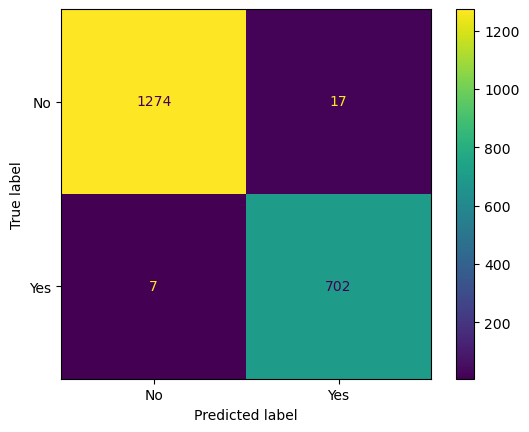

In [37]:
# Confusion matrix for the model with reduced features
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_reduced),display_labels=['No','Yes']).plot();

In [38]:
# This code trains a logistic regression model using the statsmodels library for comprehensive summary. 

# Add a constant to the resampled training data with the optimal features. 
# This constant represents the intercept term in the logistic regression equation.
X_with_const_reduced = sm.add_constant(X_train_resampled[final_features])

# Fit a logistic regression model using Statsmodels on the resampled training data with the optimal features.
reduced_logit = sm.Logit(y_train_resampled, X_with_const_reduced).fit()

# Display a comprehensive summary of the logistic regression model, including coefficients, 
# standard errors, z-values, p-values, confidence intervals, and other statistical measures.
reduced_logit.summary()

Optimization terminated successfully.
         Current function value: 0.034125
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10080
Model:                          Logit   Df Residuals:                    10070
Method:                           MLE   Df Model:                            9
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.9508
Time:                        19:39:38   Log-Likelihood:                -343.98
converged:                       True   LL-Null:                       -6986.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -26.9048      1.459    -18.443      0.000     -29.764     -24.046
Initial_days                         34.9811      1.855     18.857      0.000      31.345      38.617
Services_MRI                          2.4595      0.546      4.508      0.000       1.390       3.529
Services_CT Scan                      1.2177      0.361      3.376      0.001       0.511       1.925
Asthma                               -1.2836      0.224     -5.721      0.000      -1.723      -0.844
HighBlood                             0.8185      0.211      3.888      0.000       0.406       1.231
Stroke                                1.3003      0.261      4.987      0.000       0.789       1.811
Arthritis                            -1.0049      0.211     -4.764      0.000      -1.418      -0.591
Initial_admin_Emergency Admission     1.8488      0.219      8.437      0.000       1.419       2.278
Anxiety                              -0.9209      0.217     -4.245      0.000      -1.346      -0.496
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Initial Model:**
- Precision: The model was correct 99% of the time for class 0 and 97% of the time for class 1 when making positive predictions.
- Recall: The model captured 98% of actual class 0 cases and 99% of actual class 1 cases.
- F1-Score: Achieved 99% for class 0 and 98% for class 1.
- Accuracy: Overall, 98% of the model's predictions were accurate.

**Updated Model:**
- Precision: The model's precision improved slightly for class 1 predictions, remaining at 99% for class 0 and increasing to 98% for class 1.
- Recall: The recall rates remained consistent between the two models.
- F1-Score: Both classes saw a slight improvement in the F1-score in the updated model.
- Accuracy: The updated model's overall accuracy improved slightly to 99%.


**Comparison Summary:**

The updated model shows a slight improvement in its predictions. The precision for class 1 predictions improved, which led to an increase in the overall accuracy and F1-scores for both classes. In essence, while both models are already performing excellently, the updated model is marginally better.


# Data Summary and Implications

In [39]:
# Define a function to print the logistic regression equation in a human-readable format.
def print_logistic_equation(model, features):
    """
    Prints the equation for a logistic regression model.
    
    Parameters:
    - model : trained logistic regression model.
    - features : list or array-like, the feature names used in the logistic regression model.
    
    Returns:
    - None. The function prints the equation directly.
    """
    
    # Extract the coefficients (weights) of the model for each feature
    coef = model.coef_[0]
    
    # Extract the intercept (bias) term of the model
    intercept = model.intercept_[0]

    # Begin constructing the equation string starting with the intercept
    equation = f"log(p/1-p) = {intercept:.3f} "

    # Loop through each feature and its corresponding coefficient
    for feature, coeff in zip(features, coef):
        
        # If the coefficient is positive, format it with a positive sign
        if coeff >= 0:
            equation += f"+ {coeff:.3f}*{feature} "
        
        # If the coefficient is negative, format it with a negative sign
        else:
            equation += f"- {-coeff:.3f}*{feature} "

    # Print the constructed equation string
    print(equation)

# Use the function to print the logistic regression equation for the given model and features
print_logistic_equation(logreg_reduced, X_train_resampled.loc[:, final_features].columns)

log(p/1-p) = -12.589 + 16.771*Initial_days + 1.019*Services_MRI + 0.556*Services_CT Scan - 0.694*Asthma + 0.327*HighBlood + 0.579*Stroke - 0.461*Arthritis + 0.881*Initial_admin_Emergency Admission - 0.414*Anxiety 


Based on the coefficients, the logistic regression equation for the reduced model can be expressed as:

$\log{\left(\frac{p}{1-p}\right)}=-12.589+16.771\times\mathrm{Initial\_days}+1.019×Services\_MRI+0.556×Services\_CT Scan-0.694×Asthma+0.327×HighBlood+0.579×Stroke-0.461×Arthritis+0.881×Initial\_admin\_Emergency Admission-0.414×Anxiety$


Where:
- 𝑙𝑜𝑔 is the natural logarithm.
- 𝑝 is the probability of the dependent event occurring, in this case, readmission.

## Limitations
When making predictions using a logistic regression model, there are several limitations that need to be considered. These include: 
- Sample Size: The data we use might differ from the larger population, which could lead to different results when applied to different demographics or populations.
- Missing or Unmeasured Confounders: There may be important variables not included in the data, such as detailed medical history, which could impact hospital readmissions.
- Data Quality: The accuracy and reliability of the predictions depend on the data quality. If there are inaccuracies or inconsistencies in the data, this could lead to skewed results.
- Overfitting: A model may perform well on the training data but poorly on new, unseen data, known as overfitting. Even with regularization techniques, there is still a risk of this happening.
- External Validity: The model was trained on a specific dataset, which may not represent other hospitals, regions, or countries with different healthcare systems, practices, and patient populations.
- Class Imbalance: Even after using techniques to address class imbalance, the synthetic data generated may not fully capture the complexities and patterns of the minority class.
- Interpretability: While logistic regression is more interpretable than some complex machine learning models, interpreting results can still be challenging when regularization or high multicollinearity is introduced.
- Temporal Dynamics: The data is static, but healthcare practices, patient demographics, and disease prevalence can change over time. This means the model may need regular updating to remain relevant.
- Causality vs. Correlation: The model identifies associations but doesn't establish causality. Just because a factor is associated with readmission doesn't mean it causes readmission.
- Complete Separation: Some of the predictor variables or their combinations might perfectly predict the outcome. This can lead to overly large coefficient estimates and make some coefficients hard to estimate accurately. It's a limitation and should be kept in mind when interpreting results.


## Recommendations
Hospital readmission can be a significant concern for patients with more extended initial stays, those who undergo MRI and CT scans, or those admitted due to emergencies. To prevent readmissions, healthcare providers can implement various protocols, such as follow-ups, outpatient services, and specialized care pathways. Healthcare providers can offer specialized outpatient programs for patients with chronic conditions to help them manage their conditions and improve their quality of life. Integrating mental health services with general healthcare is also important, as it helps address anxiety and other mental health concerns, leading to better management of physical health. Data-driven interventions and telehealth solutions can monitor patients' vitals and symptoms in real time while enhancing patient education materials to help patients understand their conditions, medications, potential complications, and when to seek medical attention. Establishing a feedback loop and continuously refining prediction models to remain accurate and relevant is also essential. Taking proactive steps based on the insights from the logistic regression analysis, healthcare providers can optimize patient outcomes, improve the quality of care, and potentially reduce hospital readmissions.
